## Step 1: Install & Import Dependencies

In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [2]:
python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (581980377.py, line 1)

In [ ]:
pip install networkx

In [ ]:
pip install matplotlib


In [3]:
import re
import csv
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import urllib.request 
from bs4 import BeautifulSoup

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

## Step 2: Choose your desired Web Content, Scrape it and Save it into CSV format

Articulo caso sobornos

In [4]:

# indicate address for chosen URL
url = "https://es.wikipedia.org/wiki/Caso_Sobornos_2012-2016"
# open the URL for reading
html = urllib.request.urlopen(url)
# parsing the html file
htmlParse = BeautifulSoup(html, 'html.parser')

parsed_text = ""

for para in htmlParse.find_all("p"):
    #parsed_text_str += str(para.get_text())
    parsed_text = " ".join((parsed_text, str(para.get_text())))
    
    
sentences = [[i] for i in nlp(parsed_text).sents]

Texto almacenado en la variable parsed_text

In [5]:
parsed_text

' El caso «Sobornos 2012-2016» (17721201900029G)[1]\u200b inicialmente denominado como «caso Arroz Verde, trama Arroz Verde, y Receta de Arroz Verde 502» hace referencia a los procesos penales con sentencia ejecutoriada que continuó a una investigación sobre presuntos actos de corrupción en Ecuador.[2]\u200b \n El origen de esta investigación se dio tras una publicación en los portales digitales Mil Hojas y La Fuente, en los cuales se reveló un cuaderno escrito por Pamela Martínez, exasesora de Rafael Correa durante su gobierno,[3]\u200b y se presentó un correo electrónico con un documento adjunto titulado Receta de Arroz verde 502.[4]\u200b Estas evidencias contienen información sobre presuntos aportes de varias empresas multinacionales, incluida la constructora Odebrecht, al movimiento Alianza PAIS, ahora MOVER, dado durante la campaña para las elecciones seccionales de 2014.[3]\u200b\n Luego de ganar con el movimiento Alianza PAÍS en las elecciones presidenciales de 2006,[5]\u200b R

Se dividen las oraciones

In [6]:
sentences

[[ El caso «Sobornos 2012-2016»],
 [(17721201900029G)[1]​ inicialmente denominado como «caso Arroz Verde, trama Arroz Verde, y Receta de Arroz Verde 502» hace referencia a los procesos penales con sentencia ejecutoriada que continuó a una investigación sobre presuntos actos de corrupción en Ecuador.[2]​ 
   El origen de esta investigación se dio tras una publicación en los portales digitales],
 [Mil Hojas y La Fuente, en los cuales se reveló un cuaderno escrito por Pamela Martínez, exasesora de Rafael Correa durante su gobierno,[3]​ y se presentó un correo electrónico con un documento adjunto titulado Receta de Arroz verde 502.[4]​ Estas evidencias contienen información sobre presuntos aportes de varias empresas multinacionales, incluida la constructora Odebrecht, al movimiento Alianza PAIS, ahora MOVER, dado durante la campaña para las elecciones seccionales de 2014.[3]​
   Luego de ganar con el movimiento Alianza PAÍS en las elecciones presidenciales de 2006,[5]​ Rafael Correa  inici

Se guarda la data en un CSV 

In [7]:
myheaders = ['sentence']
myvalues = sentences
filename = 'article_text.csv'
with open(filename, 'w',newline='') as myfile:
    writer = csv.writer(myfile)
    writer.writerow(myheaders)
    writer.writerows(myvalues)

## Step 3: Manually Clean Data (if necessary) & Re-Import the CSV File

In [8]:
output_file_name = 'cleaned_output_file.csv'  # Replace 'cleaned_output_file.csv' with the desired output file name

# Read the input file
with open(filename, 'r', encoding='utf-8') as input_file:
    text = input_file.read()

# Remove blank lines
lines = text.split('\n')
non_empty_lines = filter(lambda line: line.strip() != '', lines)
cleaned_text = '\n'.join(non_empty_lines)

# Write the cleaned text to the output file
with open(output_file_name, 'w', encoding='utf-8') as output_file:
    output_file.write(cleaned_text)


In [9]:
csv_sentences = pd.read_csv("./cleaned_output_file.csv")

In [10]:
csv_sentences

,sentence
0,El caso «Sobornos 2012-2016»
1,"(17721201900029G)[1]​ inicialmente denominado como «caso Arroz Verde, trama Arroz Verde, y Receta de Arroz Verde 502» hace referencia a los procesos penales con sentencia ejecutoriada que continuó..."
2,"Mil Hojas y La Fuente, en los cuales se reveló un cuaderno escrito por Pamela Martínez, exasesora de Rafael Correa durante su gobierno,[3]​ y se presentó un correo electrónico con un documento adj..."
3,"La Constitución de 2008 establecía en su texto original que sería válida la reelección presidencial por una sola ocasión, sin embargo, no se encontraba dentro del cómputo para Correa su elección e..."
4,"Es por tal que Correa anunció su nueva postulación para las elecciones presidenciales de 2013, en binomio con Jorge Glas, en la que obtuvo su reelección como presidente del Ecuador para el período..."
5,"En diciembre de 2015, al final del período de gobierno 2013-2017 de Correa, la Asamblea Nacional aprobó un paquete de enmiendas constitucionales el 3 de diciembre con lo que se modificó el texto o..."
6,"Sin embargo, dichas enmiendas no afectarían a las posteriores elecciones de 2017, debido a una restricción en una disposición transitoria."
7,"Aunque posteriormente se hizo una campaña de recolección de firmas para proponer una reforma para dicha transitoria y habilitar la reelección de Correa, el propio Correa rechazó dicha pretensión, ..."
8,"Lenin Moreno -sucesor de Correa como líder de Alianza País- en binomio con Jorge Glas, ganaron la presidencia y vicepresidencia de la República respectivamente."
9,"Sin embargo, desde el inicio del gobierno de Moreno empezó a haber distanciamiento entre Correa y el nuevo presidente."


In [11]:

def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [12]:
get_entities("The film had 202 patents")

['film', '202  patents']

In [13]:
entity_pairs = [] 
for i in tqdm(csv_sentences["sentence"]):
    entity_pairs.append(get_entities(i))

100%|██████████| 43/43 [00:01<00:00, 40.83it/s]


In [14]:
entity_pairs[10:20]

[['la vinculación de varios otros', 'gobierno de Correa'],
 ['de Odebrecht y otras', 'pusieron presidente'],
 ['', ''],
 ['mostraba una', 'de Pamela Martínez Loayza'],
 ['por empresas multinacionales', 'como'],
 ['República durante el', 'cercana Vinicio Alvarado'],
 ['suma de las multinacionales', 'millones  dólares'],
 ['', ''],
 ['portal digital Odebrecht y otras', 'pusieron Ecuador'],
 ['se', 'los delitos de cohecho']]

## Step 5: Get Relations for the entities


In [15]:

def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1",[pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [16]:
get_relation("Gobierno de Correa")

'Correa'

In [17]:
relations = [get_relation(i) for i in tqdm(csv_sentences['sentence'])]

100%|██████████| 43/43 [00:00<00:00, 62.76it/s]


In [18]:
pd.Series(relations).value_counts()[:50]

que                       5
hasta                     2
aportes                   2
detallarían               1
posteriores               1
allanamientos             1
ciudadanas                1
penal en                  1
sede                      1
informes                  1
caso                      1
investigaciones           1
Sobornos                  1
dio                       1
Balda                     1
aportaciones              1
vio                       1
documentaciones           1
Correa                    1
públicos                  1
debido                    1
radicó                    1
presidenciales            1
Es                        1
enmiendas                 1
para                      1
Glas                      1
presidente                1
multinacionales           1
penales                   1
Zurita.[4]​               1
artículo                  1
involucrados en           1
ascendería                1
sábado                    1
aperturó            

## Step 6: Display Entity Relations into Graphs


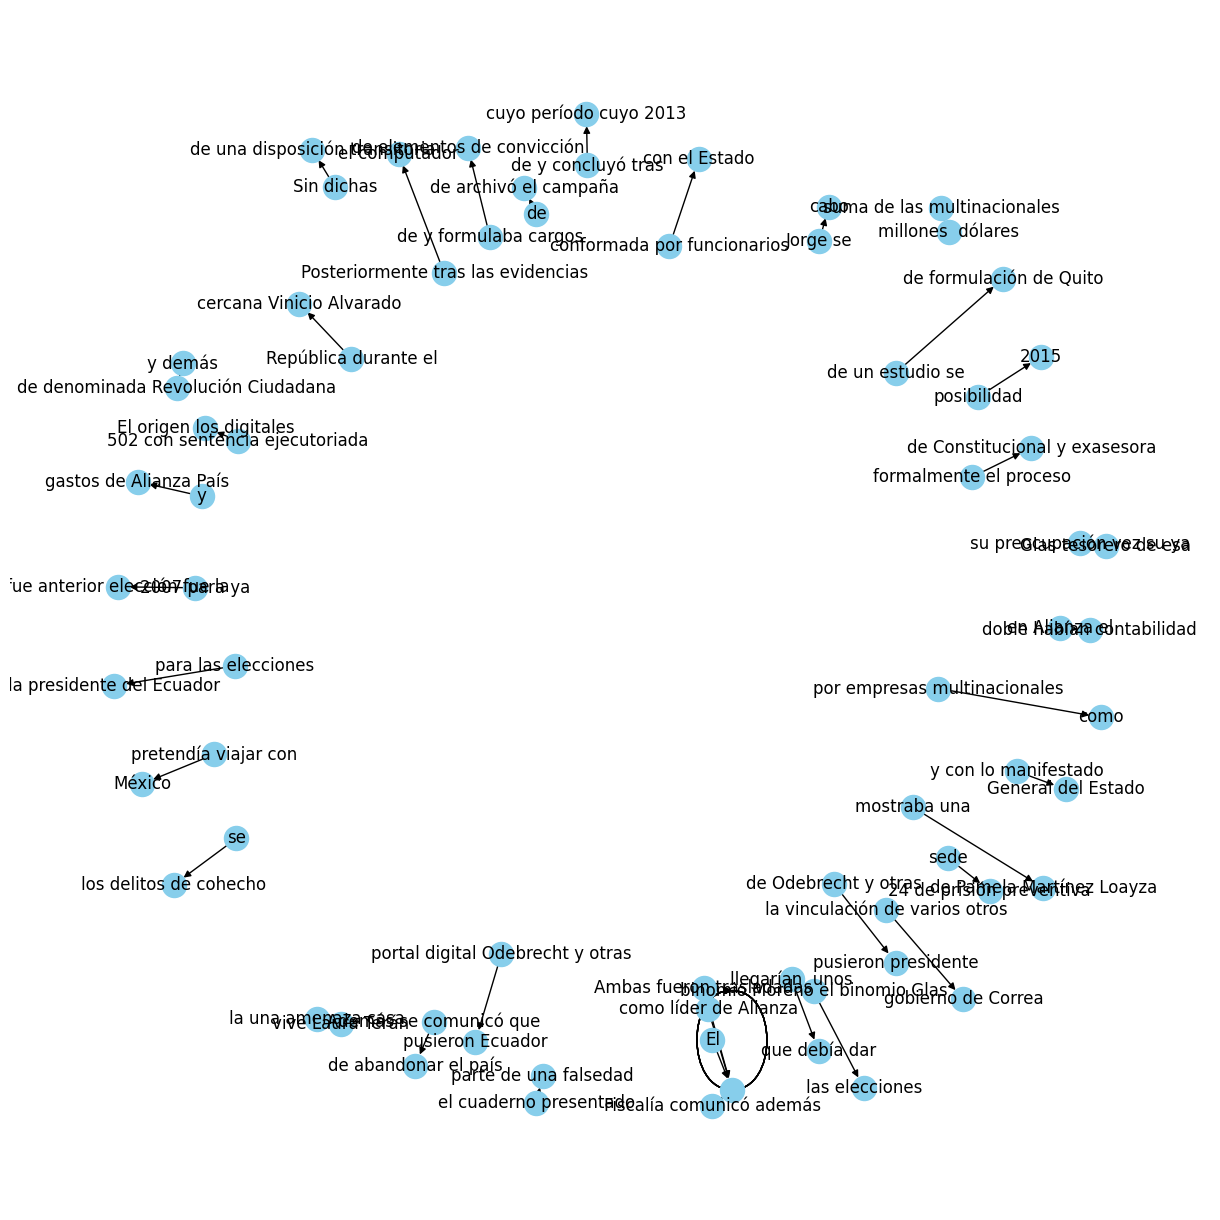

In [19]:

# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
                          

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [22]:

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="Correa"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()
view rawplot_filtered.py hosted with ❤ by GitHub

SyntaxError: invalid character '❤' (U+2764) (931865084.py, line 8)

In [23]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [24]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

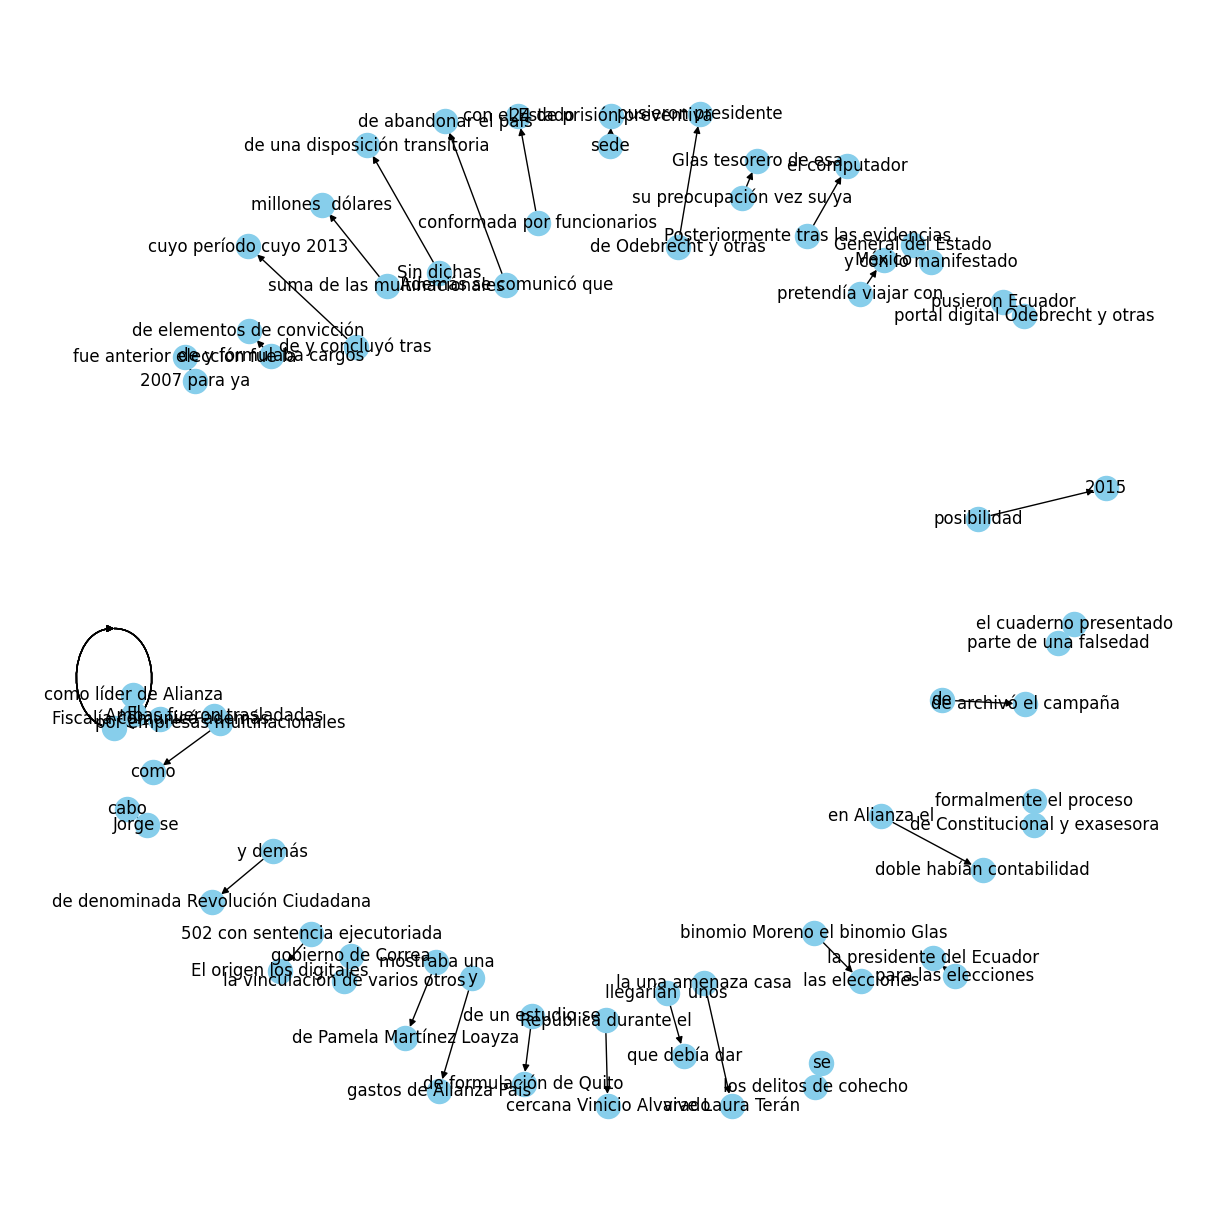

In [25]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

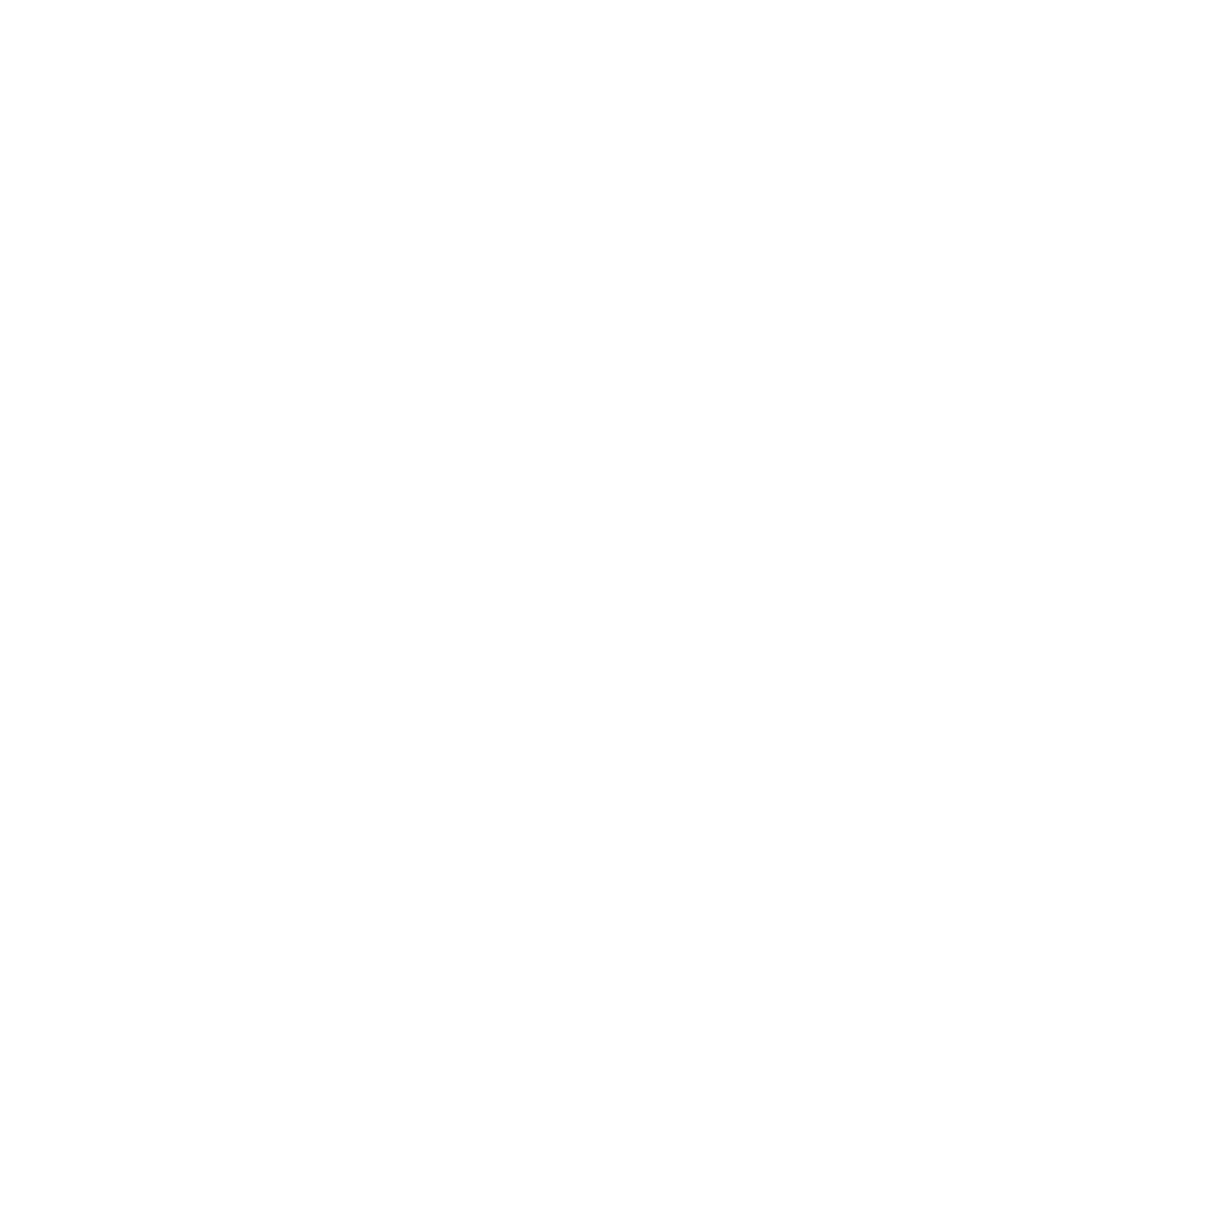

In [27]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="gobierno"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

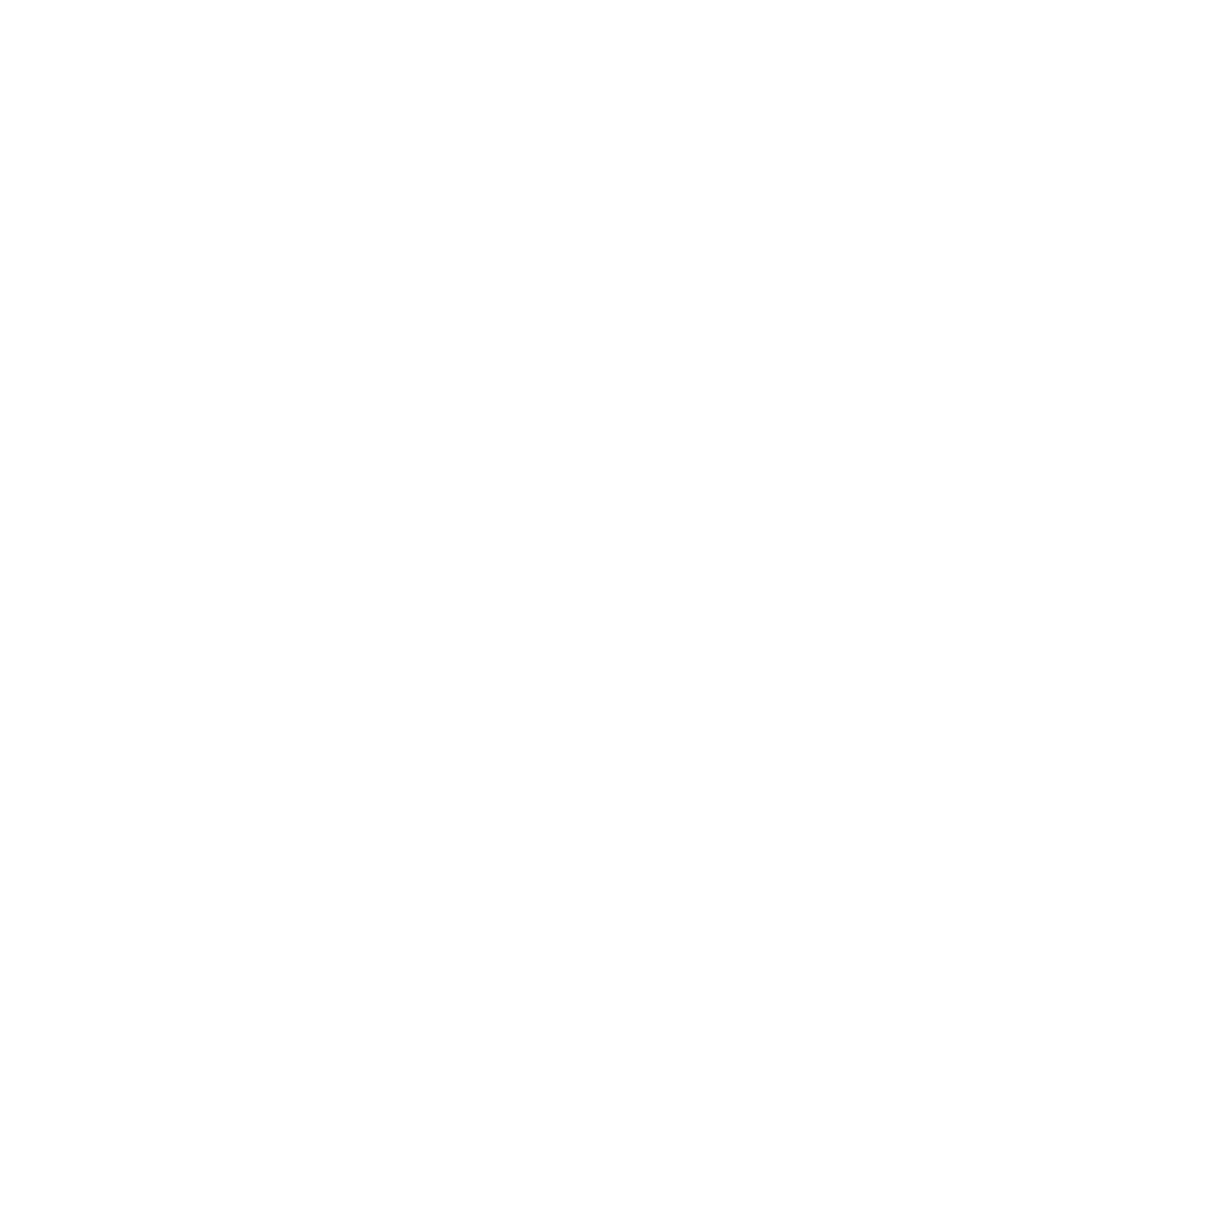

In [29]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="corrup"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()